In [41]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris['feature_names']
target_names = iris.target_names

#2項分類のサンプルにするためsetosaを削除する
#X = X[y != 0]
#y = y[y != 0]
#y = y -1
#target_names = target_names[1:]

print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']
X_train.shape =  (120, 4)
y_train.shape =  (120,)
X_test.shape =  (30, 4)
y_test.shape =  (30,)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = sklearn.ensemble.RandomForestClassifier(n_estimators=2, max_depth = 3, random_state=2)
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.9666666666666667

In [44]:
data_index = 1
y_index = y_test[data_index]
print('target name = ' + target_names[y_index])
pd.DataFrame([X_test[data_index]], columns=feature_names)

target name = setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.7,3.8,1.7,0.3


In [45]:
X_train_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)

y_label = []
for i in y_train:
    y_label.append(target_names[i])
y_train_dataframe = pd.DataFrame(y_label, columns=['result'])

train_dataframe = pd.concat([X_train_dataframe, y_train_dataframe], axis=1)

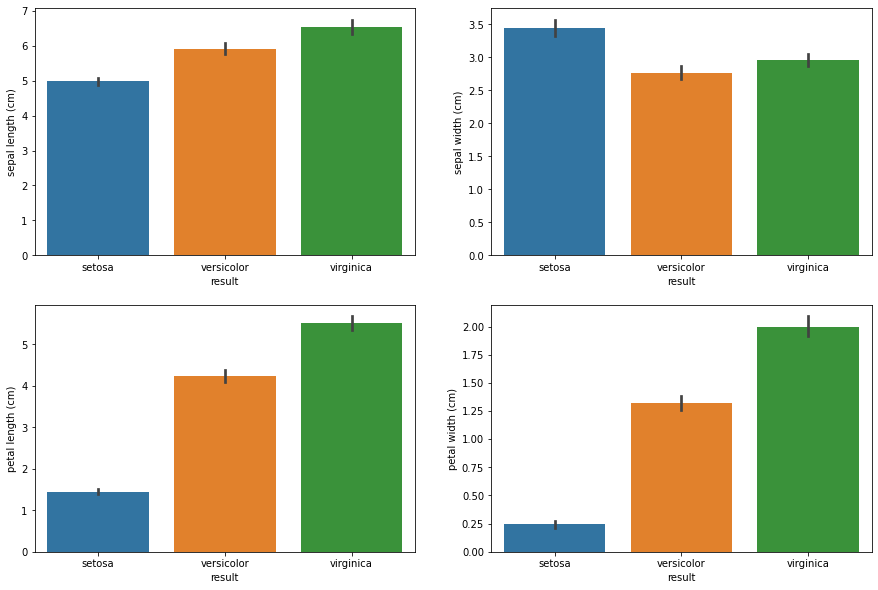

In [46]:
import seaborn as sns

fig = plt.figure(figsize=[15,10])
for i, f in enumerate(iris['feature_names']):
    fig.add_subplot(2, 2, i+1)
    sns.barplot(y=f, x='result', data= train_dataframe)

In [47]:
from sklearn.inspection import permutation_importance

pfi = permutation_importance(estimator=model,
                             X=X_test,
                             y=y_test,
                             scoring='neg_root_mean_squared_error',
                             n_repeats=5,
                             n_jobs=-1,
                             random_state=42)

pfi_df = pd.DataFrame(data={'feature_names': feature_names, 'importance': pfi['importances_mean']})
pfi_df = pfi_df.sort_values('importance')
pfi_df

,feature_names,importance
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000
2,petal length (cm),0.668621
3,petal width (cm),0.771714


<BarContainer object of 4 artists>

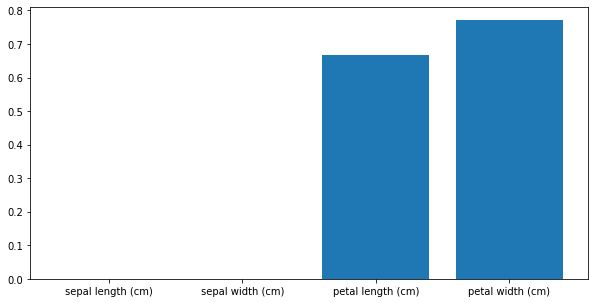

In [48]:
fig = plt.figure(figsize=[10,5])
plt.bar(pfi_df['feature_names'],
        
       pfi_df['importance'])

c:\users\naolu\documents\github\xai_samples\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
c:\users\naolu\documents\github\xai_samples\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
c:\users\naolu\documents\github\xai_samples\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings

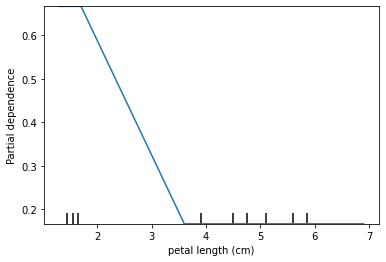

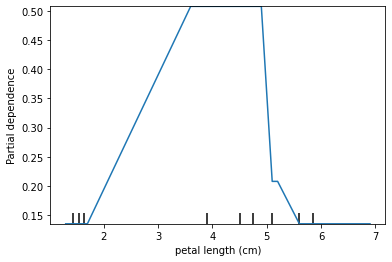

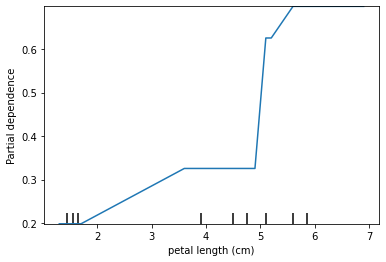

In [69]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

for i in range(len(target_names)):
    plot_partial_dependence(estimator=model,
                             X=X_test,
                             features=['petal length (cm)'],
                             feature_names=feature_names,
                             target=i,#ターゲット名
                             kind='average')


In [ ]:
target_names.index('setosa')

In [50]:
np.where(target_names = 'setosa')

TypeError: where() got an unexpected keyword argument 'target_names'

In [53]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
np.where(target_names[0])

(array([0], dtype=int64),)